# IMPORT LIBRARIES

In [1]:
import os
import glob
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
import tensorflow as tf

# Data prepararing

In [2]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)

test_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
train_generator = train_datagen.flow_from_directory("emirhan_human_dataset/datasets/human_data/train_data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest")
test_generator = test_datagen.flow_from_directory("emirhan_human_dataset/datasets/human_data/test_data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest")

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


# Model structure using functions

In [3]:
def func(pre,name_model):
    print('#####~Model => {} '.format(name_model))
    pre_model = name_model(input_shape=(128,128, 3),
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = False
    inputs = pre_model.input
    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(15, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,validation_data=test_generator,epochs=5,callbacks=my_callbacks,verbose=0)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

In [4]:
def emir_model():
  inp = Input(shape = (128,128,3))

  x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(inp)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(256, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(256, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(512, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(512, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(1024, (3,3), strides=(2, 2), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(512, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(15, activation='softmax')(x)

  model = Model(inputs=inp, outputs= x)
  return model

In [5]:
def emirhan_func(name_model):

    print('#####~Model => {} '.format(name_model))

    model = emir_model()
    model.summary()

    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,
                        validation_data=test_generator,
                        epochs=64,
                        callbacks=my_callbacks,
                        verbose=0,
                        batch_size=128,)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

In [6]:
def depth(x, strides):
    x = DepthwiseConv2D(3,strides=strides,padding='same',  use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
def single_conv_block(x,filters):
    x = Conv2D(filters,1,use_bias=False)(x)
    x= BatchNormalization()(x)
    x = ReLU()(x)
    x = SpatialDropout2D(0.2)(x)
    return x
def hidden_layers(x,filters,strides):
    x = depth(x,strides)
    x = single_conv_block(x, filters)
    return x
def EmirhanModel(input_shape=(128,128,3),n_classes = 15):
    input = Input (input_shape)
    x = Conv2D(32,3,strides=(2,2),padding = 'same', use_bias=False) (input)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = ZeroPadding2D(padding=(2, 2))(x)
    x = hidden_layers(x,64, strides=(1,1))
    x = hidden_layers(x,128,strides=(2,2))
    x = hidden_layers(x,128,strides=(1,1))
    x = hidden_layers(x,256,strides=(2,2))
    x = hidden_layers(x,256,strides=(1,1))
    x = hidden_layers(x,512,strides=(2,2))
    for _ in range(5):
      x = hidden_layers(x,512,strides=(1,1))
      x = hidden_layers(x,1024,strides=(2,2))
      x = hidden_layers(x,1024,strides=(1,1))
      x = GlobalAveragePooling2D()(x)
      x = Dense(64, activation='relu')(x)
      x = Dense(64, activation='relu')(x)
      output = Dense(n_classes,activation='softmax')(x)
      model = Model(input, output)
      return model
number_of_classes = 15
input_shape = (128,128,3)

In [7]:
def emirhan(name_model):

    print('#####~Model => {} '.format(name_model))

    model = EmirhanModel(input_shape,number_of_classes)
    print(model.summary())
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,
                        validation_data=test_generator,
                        epochs=64,
                        callbacks=my_callbacks,
                        verbose=0,
                        batch_size=128,)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

# prepare models and mention their score

using VGG19

#####~Model => <function VGG19 at 0x00000237B56DB400> 


c:\Users\zhxu3\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\zhxu3\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\zhxu3\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_calle

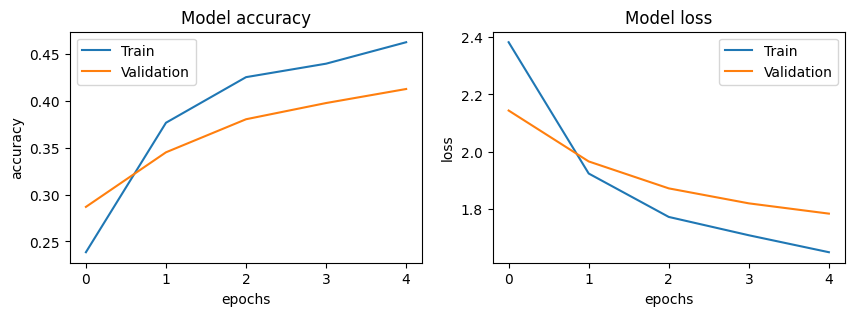

24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step
              Classification_report 
              Results 
    Test Loss:  1.78395  
Test Accuracy:  41.30%  


In [8]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
result_vgg19 = func(preprocess_input,VGG19)

using VGG16

#####~Model => <function VGG16 at 0x00000208C522B1C0> 
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


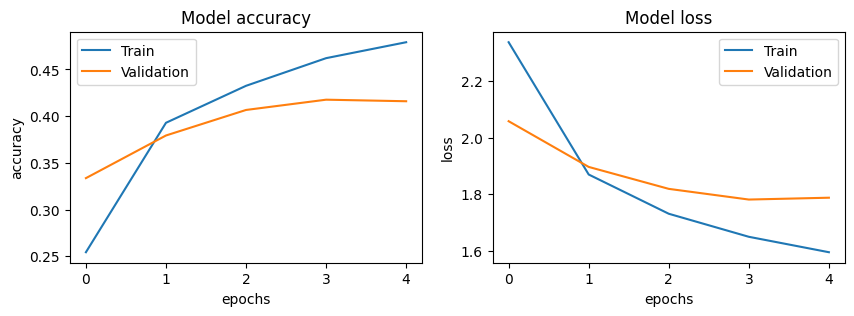

24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step
              Classification_report 
              Results 
    Test Loss:  1.78821  
Test Accuracy:  41.60%  


In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
result_VGG16 = func(preprocess_input,VGG16)

using ResNet50

#####~Model => <function ResNet50 at 0x7deb90282830> 
94765736/94765736 [==============================] - 3s 0us/step


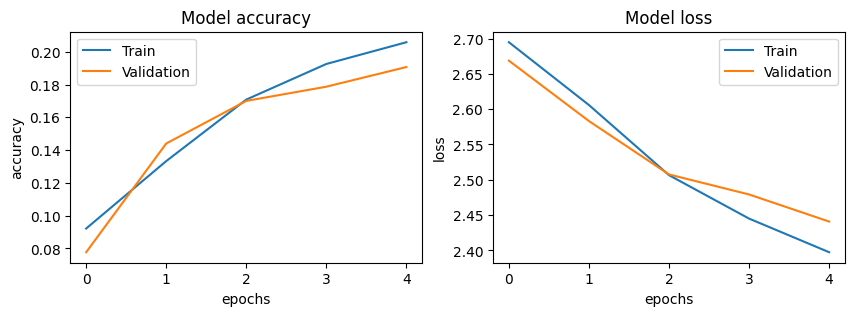

24/24 [==============================] - 5s 169ms/step
              Classification_report 
              Results 
    Test Loss:  2.44092  
Test Accuracy:  19.07%  


In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
result_ResNet50 = func(preprocess_input,ResNet50)

using ResNet101 

#####~Model => <function ResNet101 at 0x7deb902828c0> 
171446536/171446536 [==============================] - 6s 0us/step


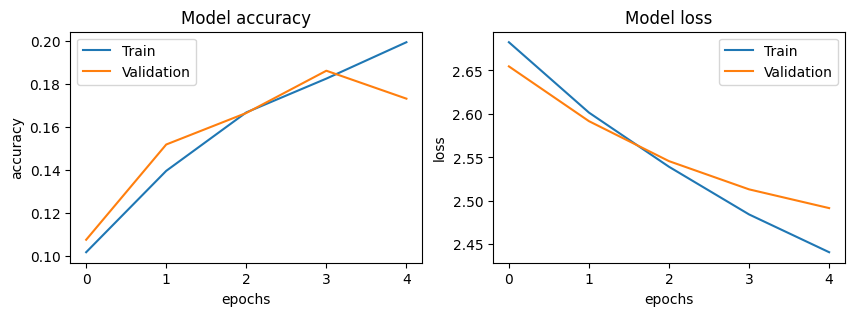

24/24 [==============================] - 6s 181ms/step
              Classification_report 
              Results 
    Test Loss:  2.49168  
Test Accuracy:  17.33%  


In [11]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
result_ResNet101 = func(preprocess_input,ResNet101)

using MobileNet

#####~Model => <function MobileNet at 0x00000237B56D8EE0> 


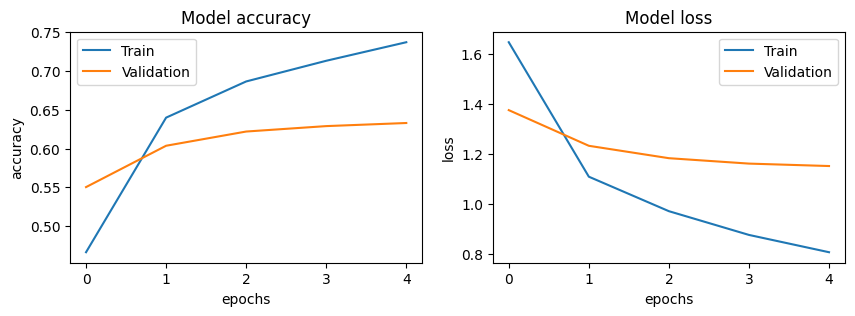

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step
              Classification_report 
              Results 
    Test Loss:  1.15093  
Test Accuracy:  63.30%  


In [9]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
result_MobileNet = func(preprocess_input,MobileNet)

using DenseNet201

#####~Model => <function DenseNet201 at 0x00000237B56AF250> 
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


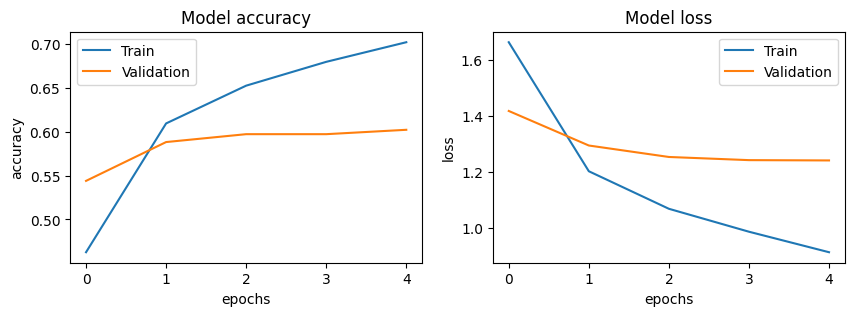

24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step 
              Classification_report 
              Results 
    Test Loss:  1.24058  
Test Accuracy:  60.23%  


In [10]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
result_DenseNet201 = func(preprocess_input,DenseNet201)

using EfficientNetB7

#####~Model => <function EfficientNetB7 at 0x7deb9025f010> 
258076736/258076736 [==============================] - 9s 0us/step


2023-10-11 15:44:41.588897: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_6/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


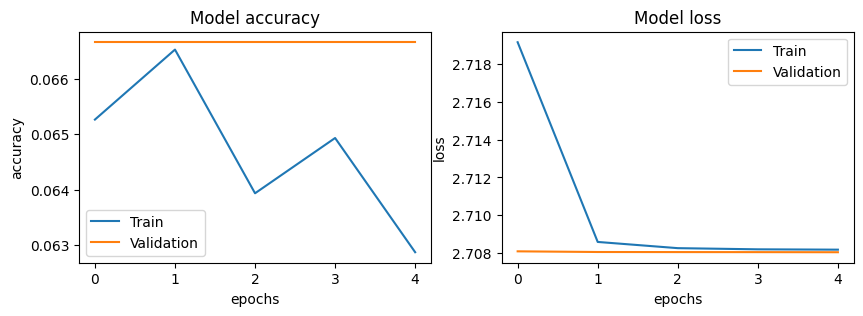

24/24 [==============================] - 11s 270ms/step
              Classification_report 
              Results 
    Test Loss:  2.70805  
Test Accuracy:  6.67%  


In [14]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
result_Eff = func(preprocess_input,EfficientNetB7)

Xception

#####~Model => <function Xception at 0x7deb902b8040> 
83683744/83683744 [==============================] - 3s 0us/step


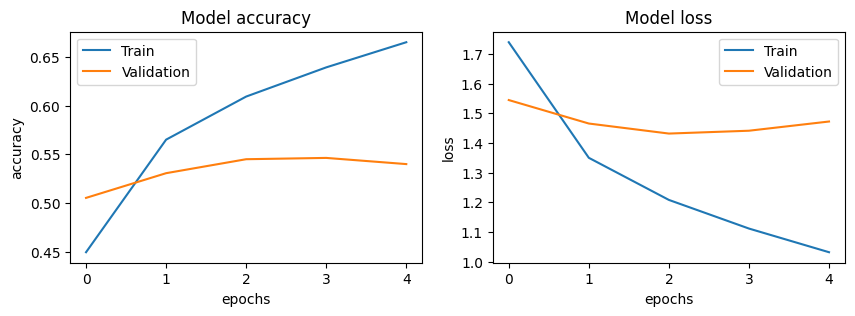

24/24 [==============================] - 5s 189ms/step
              Classification_report 
              Results 
    Test Loss:  1.47237  
Test Accuracy:  54.00%  


In [15]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
result_Xception = func(preprocess_input,Xception)

InceptionResNetV2

#####~Model => <function InceptionResNetV2 at 0x7deb9025feb0> 
219055592/219055592 [==============================] - 6s 0us/step


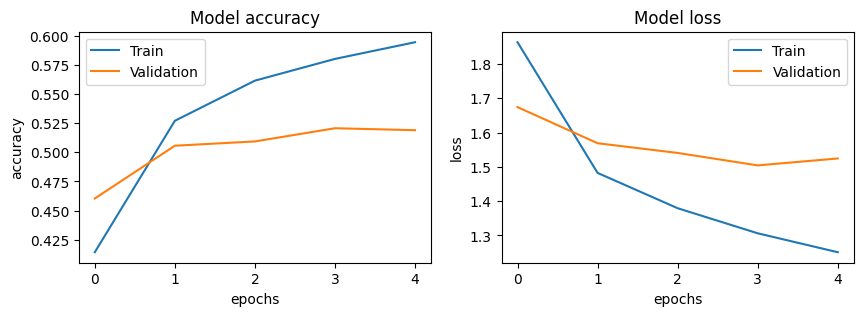

24/24 [==============================] - 8s 195ms/step
              Classification_report 
              Results 
    Test Loss:  1.52455  
Test Accuracy:  51.90%  


In [16]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
result_InResNetV2 = func(preprocess_input,InceptionResNetV2)

Model Emirhan

#####~Model => Emirhan_Human_Action_Detection_with_Artificial_Intelligence 
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_207 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_207 (Ba  (None, 128, 128, 32)     128       
 tchNormalization)                                               
                                                                 
 conv2d_208 (Conv2D)         (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_208 (Ba  (None, 128, 128, 32)     128       
 tchNormalization)                                               
                                                 

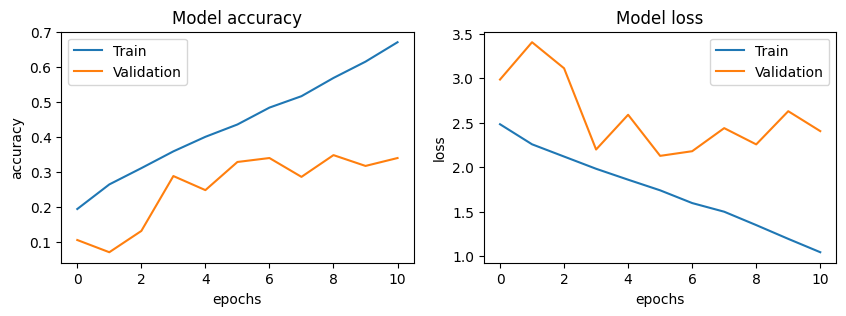

24/24 [==============================] - 5s 180ms/step
              Classification_report 
              Results 
    Test Loss:  2.38707  
Test Accuracy:  34.27%  


In [17]:
model_name = "Emirhan_Human_Action_Detection_with_Artificial_Intelligence"
result_emirhan = emirhan_func(model_name)

Finally Result of Table (DataFrame - Pandas)

In [18]:
accuracy_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Accuracy':[result_emirhan[1],result_VGG16[1], result_vgg19[1], result_ResNet50[1], result_ResNet101[1],
                                  result_MobileNet[1],result_InResNetV2[1],result_DenseNet201[1],result_Xception[1],
                                 result_Eff[1]]})

In [19]:
accuracy_result_table

,Model,Accuracy
0,Emirhan_Model,0.342667
1,VGG16,0.365333
2,VGG19,0.326000
3,ResNet50,0.190667
4,ResNet101,0.173333
5,MobileNet,0.635000
6,InceptionResNetV2,0.519000
7,DenseNet201,0.595000
8,Xception,0.540000
9,EfficientNetB7,0.066667


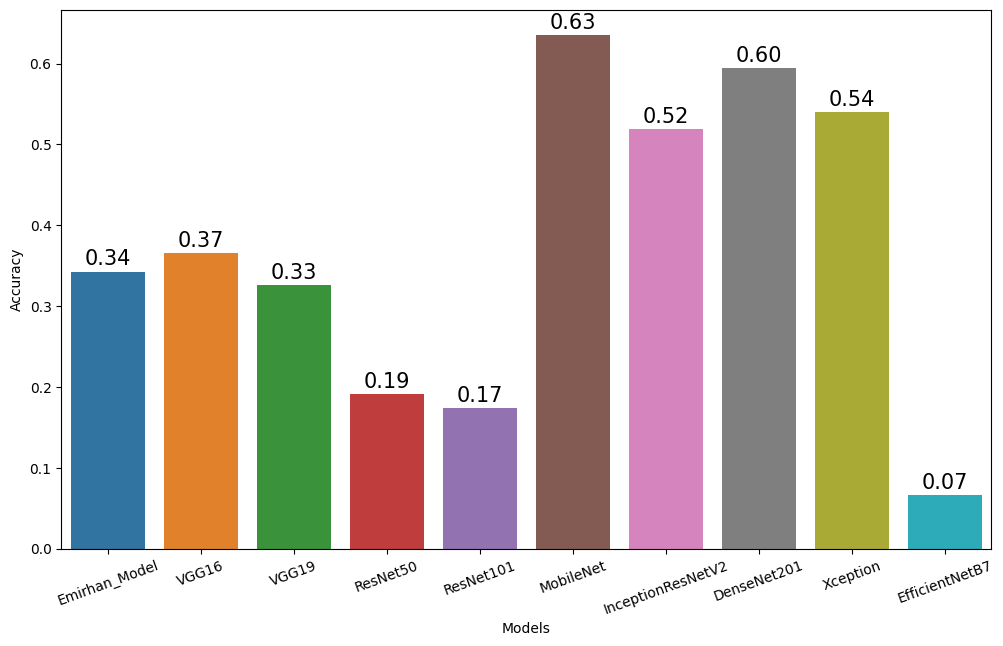

In [20]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=accuracy_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);


In [21]:
loss_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Loss':[result_emirhan[0],result_VGG16[0], result_vgg19[0], result_ResNet50[0], result_ResNet101[0],
                                  result_MobileNet[0],result_InResNetV2[0],result_DenseNet201[0],result_Xception[0],
                                 result_Eff[0]]})

In [22]:
loss_result_table

,Model,Loss
0,Emirhan_Model,2.387074
1,VGG16,1.978606
2,VGG19,2.081073
3,ResNet50,2.440918
4,ResNet101,2.491677
5,MobileNet,1.134146
6,InceptionResNetV2,1.524555
7,DenseNet201,1.234813
8,Xception,1.472374
9,EfficientNetB7,2.708053


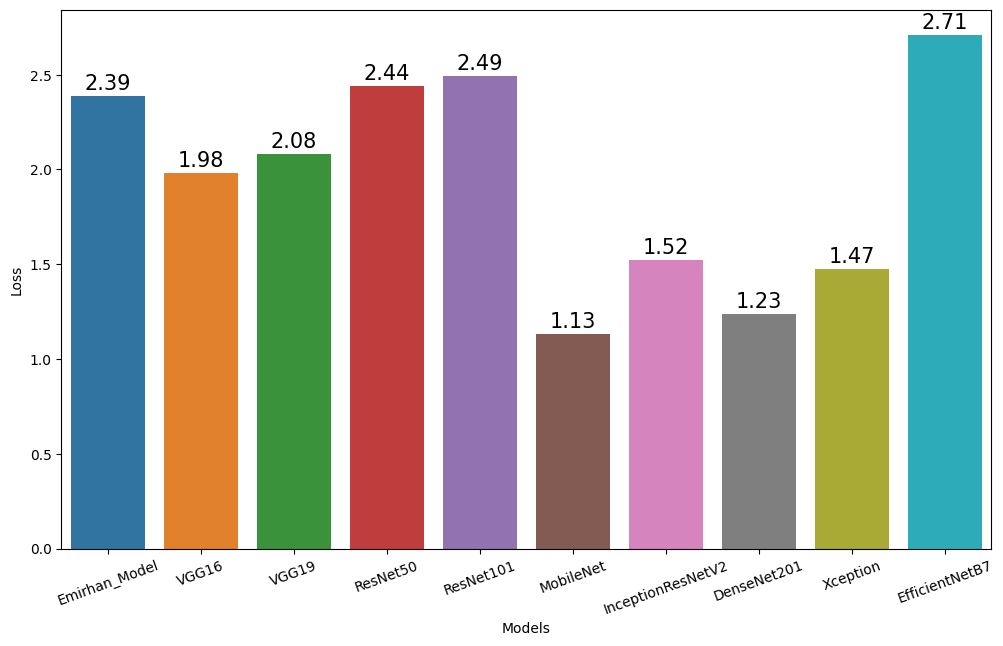

In [23]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Loss', data=loss_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Loss")
plt.xticks(rotation=20);